# Twitch Data analysis - Top 3000 most watched twitch channels in 2020

Author: Orhan Taskopru <br>
Date created: 25-01-2021 <br>
Data source: https://sullygnome.com/channels/2020/watched <br>



Support the creator of the twitch analysis platform: <br>
https://www.patreon.com/sullygnome
<a id='top'></a>

### Index <a id='index'></a>

1. [Forming the dataframe](#index1) 
2. [Exploratory data analysis](#index2)   
3. [Creating a search function to filter on column values](#index3) 
4. [Predicting watch time with linear regression](#index4)
5. [Conclusions](#index5)



## 1. Forming the dataframe <a id='index1'></a>

### 1a. Importing the required packages

In [41]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import wordcloud
from wordcloud import WordCloud

### 1b. Read in te csv files

In [7]:
# 1-10
df1= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 1.csv")
df2= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 2.csv")
df3= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 3.csv")
df4= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 4.csv")
df5= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 5.csv")
df6= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 6.csv")
df7= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 7.csv")
df8= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 8.csv")
df9= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 9.csv")
df10= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 10.csv")
# 11-20
df11= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 11.csv")
df12= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 12.csv")
df13= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 13.csv")
df14= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 14.csv")
df15= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 15.csv")
df16= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 16.csv")
df17= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 17.csv")
df18= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 18.csv")
df19= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 19.csv")
df20= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 20.csv")
# 21-30
df21= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 21.csv")
df22= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 22.csv")
df23= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 23.csv")
df24= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 24.csv")
df25= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 25.csv")
df26= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 26.csv")
df27= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 27.csv")
df28= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 28.csv")
df29= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 29.csv")
df30= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 30.csv")

### 1c. Concatenate all the retrieved dataframes into 1

In [8]:
Dataframes=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30]
df=pd.concat(Dataframes)
df.head()

,Unnamed: 0,Unnamed: 1,Channel,Watch time,Stream time,Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Unnamed: 13
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,8847081540,215010,222720,41146,7491936,5364951,132751155,True,False,English,xQcOW
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,7720563330,517155,387315,14928,2406348,1416066,136956383,True,True,Portuguese,Gaules
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6505033950,221550,310998,29361,5773448,1696810,94561929,True,False,English,summit1g
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4,ESL_CSGO,4786942590,518580,300575,9230,4329294,892718,128514894,True,False,English,ESL_CSGO
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,5,NICKMERCS,4406970885,127065,163241,34682,4981557,1691981,54622518,True,False,English,NICKMERCS


### 1d. Adjusting columns and saving the dataframe as a csv file

In [9]:
df.drop(['Unnamed: 0', 'Unnamed: 1','Unnamed: 13'], axis=1, inplace=True)
df=df.reset_index(drop=True)
df

,Channel,Watch time,Stream time,Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,8847081540,215010,222720,41146,7491936,5364951,132751155,True,False,English
1,Gaules,7720563330,517155,387315,14928,2406348,1416066,136956383,True,True,Portuguese
2,summit1g,6505033950,221550,310998,29361,5773448,1696810,94561929,True,False,English
3,ESL_CSGO,4786942590,518580,300575,9230,4329294,892718,128514894,True,False,English
4,NICKMERCS,4406970885,127065,163241,34682,4981557,1691981,54622518,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
2995,Rallied,43953420,112515,6246,390,143037,17598,541827,True,False,English
2996,LuckyGhostTV,43890465,153825,3536,284,19154,14958,895411,True,False,English
2997,Bestmarmotte,43880085,118725,3405,369,89002,13499,1189036,True,False,French
2998,Marco,43875465,123405,3538,355,37141,8715,618823,True,False,French


In [10]:
df['Hours streamed in 2020']=df['Stream time']/60
df['Daily streamtime (hours)']=df['Stream time']/21900 #60*365
df = df[["Channel", "Watch time", "Stream time",  "Hours streamed in 2020", "Daily streamtime (hours)", "Peak viewers", "Average viewers", "Followers", "Followers gained", "Views gained", "Partnered",'Mature', 'Language']]

In [11]:
df.to_csv(r'C:\Users\Orhan\Downloads\Porto\Most watched Twitch streamers-2020.csv')

In [12]:
df.head()

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,8847081540,215010,3583.50,9.817808,222720,41146,7491936,5364951,132751155,True,False,English
1,Gaules,7720563330,517155,8619.25,23.614384,387315,14928,2406348,1416066,136956383,True,True,Portuguese
2,summit1g,6505033950,221550,3692.50,10.116438,310998,29361,5773448,1696810,94561929,True,False,English
3,ESL_CSGO,4786942590,518580,8643.00,23.679452,300575,9230,4329294,892718,128514894,True,False,English
4,NICKMERCS,4406970885,127065,2117.75,5.802055,163241,34682,4981557,1691981,54622518,True,False,English


## 2 Exploratory data analysis <a id='index2'></a>

### 2a. Dataframe description 
<a id='4'></a>

In [13]:
df.describe()

,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03
mean,2.218344e+08,106918.805000,1781.980083,4.882137,2.256100e+04,2958.502000,3.721360e+05,1.621785e+05,6.765231e+06
std,4.444101e+08,79356.330635,1322.605511,3.623577,4.766869e+04,6088.558948,7.283210e+05,3.477038e+05,1.731760e+07
min,4.380940e+07,570.000000,9.500000,0.026027,2.950000e+02,90.000000,1.171000e+03,-3.785400e+04,2.418400e+04
25%,6.111260e+07,59025.000000,983.750000,2.695205,4.713750e+03,691.000000,8.653300e+04,2.404275e+04,1.721671e+06
50%,9.690195e+07,95707.500000,1595.125000,4.370205,9.519500e+03,1287.500000,1.808815e+05,6.212800e+04,3.247381e+06
75%,2.041319e+08,133608.750000,2226.812500,6.100856,2.114800e+04,2738.500000,3.748155e+05,1.600750e+05,6.418004e+06
max,8.847082e+09,524535.000000,8742.250000,23.951370,1.016962e+06,172479.000000,1.664829e+07,5.364951e+06,7.202919e+08


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Channel                   3000 non-null   object 
 1   Watch time                3000 non-null   int64  
 2   Stream time               3000 non-null   int64  
 3   Hours streamed in 2020    3000 non-null   float64
 4   Daily streamtime (hours)  3000 non-null   float64
 5   Peak viewers              3000 non-null   int64  
 6   Average viewers           3000 non-null   int64  
 7   Followers                 3000 non-null   int64  
 8   Followers gained          3000 non-null   int64  
 9   Views gained              3000 non-null   int64  
 10  Partnered                 3000 non-null   bool   
 11  Mature                    3000 non-null   bool   
 12  Language                  3000 non-null   object 
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 263.8

### 2b. Language, Partnership and Maturity analysis


In [15]:
df_language_mean=df.groupby(['Language']).mean()
df_language_mean=df_language_mean.sort_values(by='Watch time', ascending=False)
df_language_mean.head()

,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Language,,,,,,,,,,,
English,2.512234e+08,111318.219895,1855.303665,5.083024,27276.082274,3469.731488,462508.180254,172558.186986,7.206078e+06,0.949140,0.290202
Portuguese,2.422367e+08,132880.000000,2214.666667,6.067580,21508.833333,2442.209524,367570.547619,203848.209524,6.366646e+06,0.957143,0.328571
Slovak,2.368400e+08,132922.500000,2215.375000,6.069521,8238.500000,1710.000000,231892.500000,53523.000000,6.516963e+06,1.000000,0.500000
Spanish,2.201337e+08,80148.419118,1335.806985,3.659745,30198.841912,3550.169118,525794.172794,369211.783088,6.745779e+06,0.952206,0.224265
Korean,2.076696e+08,103282.696335,1721.378272,4.716105,14419.492147,2516.565445,195393.073298,65661.031414,6.410463e+06,0.947644,0.047120


In [16]:
df_language_sum=df.groupby(['Language']).sum()
df_language_sum=df_language_sum.sort_values(by='Watch time', ascending=False)
df_language_sum.head(5)


,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Language,,,,,,,,,,,
English,335885633400,148832460,2480541.00,6796.002740,36468122,4639031,618373437,230710296,9634526279,1269,388
Spanish,59876376120,21800370,363339.50,995.450685,8214085,965646,143016015,100425605,1834851918,259,61
Portuguese,50869699335,27904800,465080.00,1274.191781,4516855,512864,77189815,42808124,1336995653,201,69
Russian,43667961765,22581825,376363.75,1031.133562,4218302,587218,49135584,22290782,2181166990,202,42
Korean,39664900785,19726995,328783.25,900.776027,2754123,480664,37320077,12541257,1224398433,181,9


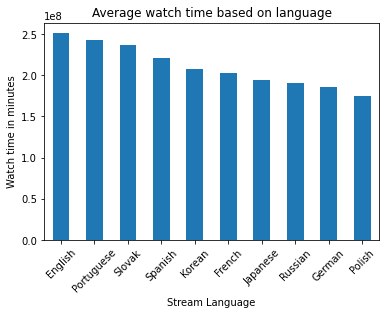

In [17]:
Language_Graph_Data=df_language_mean['Watch time'].head(10)
Language_Graph_Data.plot(kind='bar')
plt.title("Average watch time based on language")
plt.xlabel("Stream Language")
plt.xticks(rotation=45)
plt.ylabel("Watch time in minutes")
plt.show()

<a id='1'></a>

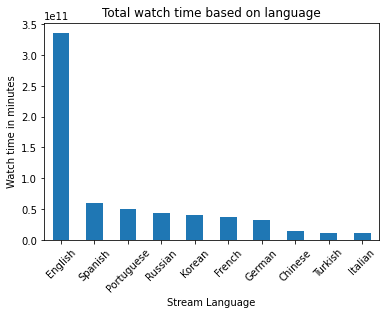

In [18]:
Language_Graph_Data=df_language_sum['Watch time'].head(10)
Language_Graph_Data.plot(kind='bar')
plt.title("Total watch time based on language")
plt.xlabel("Stream Language")
plt.xticks(rotation=45)
plt.ylabel("Watch time in minutes")
plt.show()

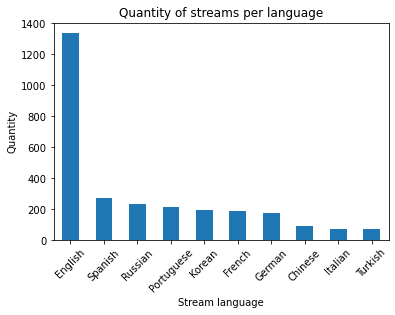

In [19]:
df_lang=df['Language'].value_counts()
df_lang=df_lang.head(10)
df_lang.plot(kind='bar')
plt.title("Quantity of streams per language")
plt.xlabel("Stream language")
plt.xticks(rotation=45)
plt.ylabel("Quantity")
plt.show()

In [20]:
df_partnership_mean=df.groupby(['Partnered']).mean()
df_partnership_mean=df_partnership_mean.sort_values(by='Watch time', ascending=False)
df_partnership_mean.head()

,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Mature
Partnered,,,,,,,,,,
True,2.268068e+08,105440.499474,1757.341658,4.814635,22703.458815,2944.998598,381871.850683,164719.550648,6.820163e+06,0.264984
False,1.253291e+08,135610.000000,2260.166667,6.192237,19796.224490,3220.578231,183180.414966,112862.074830,5.699098e+06,0.265306


<a id='2'></a>

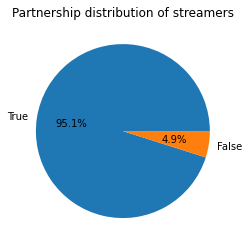

In [21]:
df['Partnered'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Partnership distribution of streamers")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [22]:
df_maturity_mean=df.groupby(['Mature']).mean()
df_maturity_mean=df_maturity_mean.sort_values(by='Watch time', ascending=False)
df_maturity_mean.head()

,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered
Mature,,,,,,,,,,
False,2.333598e+08,106026.210884,1767.103515,4.841379,23774.847619,3247.167800,398019.703401,175870.453968,7.566857e+06,0.951020
True,1.898678e+08,109394.490566,1823.241509,4.995182,19194.306918,2157.862893,300345.238994,124202.832704,4.541851e+06,0.950943


<a id='3'></a>

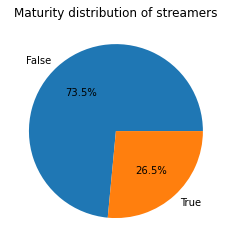

In [23]:
df['Mature'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Maturity distribution of streamers")
plt.xlabel("")
plt.ylabel("")
plt.show()

### 2c. Checking skewness of numerical columns

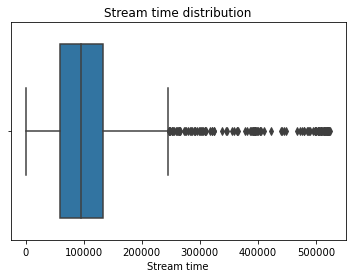

In [24]:
sns.boxplot(x=df['Stream time'])
plt.title("Stream time distribution")
plt.show()

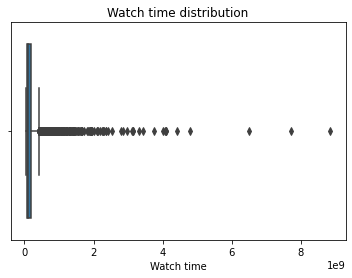

In [25]:
sns.boxplot(x=df['Watch time'])
plt.title("Watch time distribution")
plt.show()

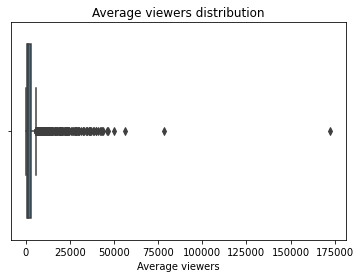

In [26]:
sns.boxplot(x=df['Average viewers'])
plt.title("Average viewers distribution")
plt.show()

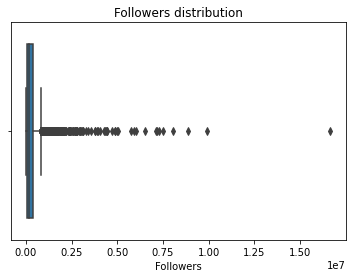

In [27]:
sns.boxplot(x=df['Followers'])
plt.title("Followers distribution")
plt.show()

### 2d. Analyzing the correlation between columns

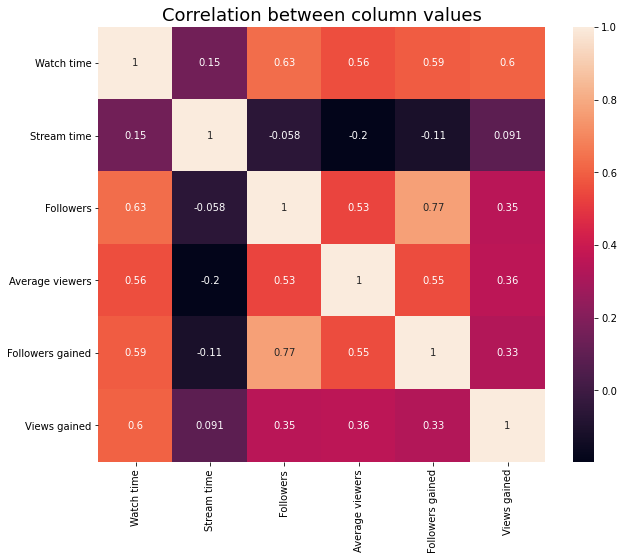

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Watch time', 'Stream time', 'Followers','Average viewers','Followers gained','Views gained']].corr(), annot = True) 
plt.title('Correlation between column values', fontsize = 18)
plt.show()

### 2e. A histogram to display daily stream time in hours

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


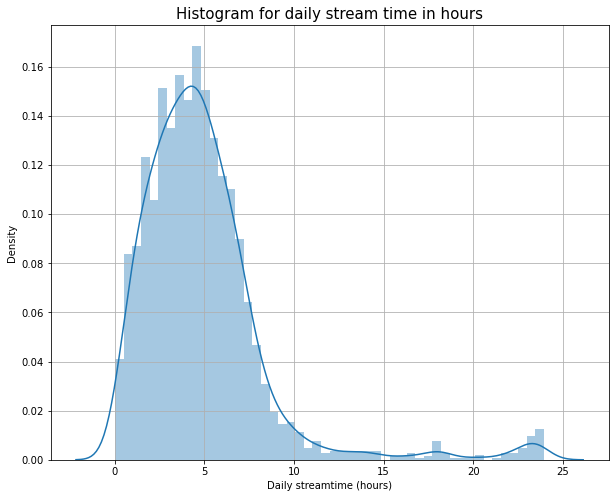

In [29]:
plt.figure(figsize = (10,8))
sns.distplot(df['Daily streamtime (hours)'])
plt.title('Histogram for daily stream time in hours', fontsize=15)
plt.grid()
plt.show()

### 2f. A wordcloud to visualize language popularity

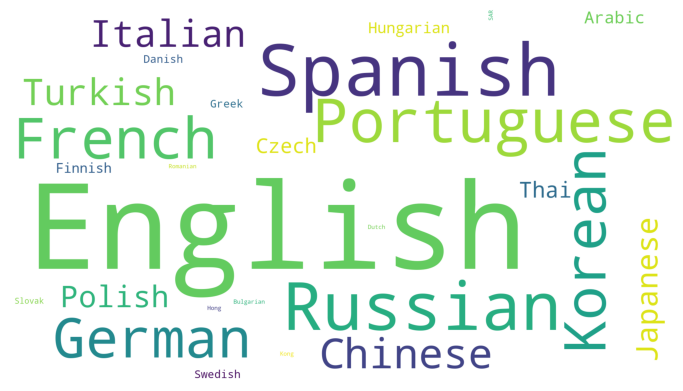

In [56]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Language))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3. Creating a search function to filter on column values <a id='index3'></a>

In [30]:
def search(x):
    #This function filters the dataframe based on:
    #Index (1-3000), channel name, langauge, maturity and partnership status
    #Input is case sensitive
    if df.loc[df['Channel']==x].shape[0] > 0:
        return df.loc[df['Channel']==x]
    elif df.loc[df['Language']==x].shape[0] > 0:
        return df.loc[df['Language']==x]
    elif df.loc[df['Language']==x].shape[0] > 0:
        return df.loc[df['Language']==x]
    elif x=='Partnered':
        return df[df['Partnered'] == True]
    elif x=='not Partnered':
        return df[df['Partnered'] == False]
    elif x=='Mature':
        return df[df['Mature'] == True]
    elif x=='not Mature':
        return df[df['Mature'] == False]
    elif int(x) in range(3000):
        return df.iloc[[x]]
    else:
        return print('Result not found in dataframe(input is case sensitive, index range is 0-2999)')         

In [52]:
search('777')

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
777,Patriota,197587035,88110,1468.5,4.023288,29435,2242,831660,465846,6108760,True,False,Portuguese


In [32]:
search('loltyler1')

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
5,loltyler1,4096418850,143265,2387.75,6.541781,105499,28593,4043212,1059740,67469321,True,False,English


In [33]:
search('English')

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,8847081540,215010,3583.50,9.817808,222720,41146,7491936,5364951,132751155,True,False,English
2,summit1g,6505033950,221550,3692.50,10.116438,310998,29361,5773448,1696810,94561929,True,False,English
3,ESL_CSGO,4786942590,518580,8643.00,23.679452,300575,9230,4329294,892718,128514894,True,False,English
4,NICKMERCS,4406970885,127065,2117.75,5.802055,163241,34682,4981557,1691981,54622518,True,False,English
5,loltyler1,4096418850,143265,2387.75,6.541781,105499,28593,4043212,1059740,67469321,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,SDShepard,43995000,171045,2850.75,7.810274,1321,256,20563,5481,499705,True,False,English
2994,finalfantasyxiv,43993740,6735,112.25,0.307534,30857,6531,154816,20327,790648,True,False,English
2995,Rallied,43953420,112515,1875.25,5.137671,6246,390,143037,17598,541827,True,False,English
2996,LuckyGhostTV,43890465,153825,2563.75,7.023973,3536,284,19154,14958,895411,True,False,English


In [34]:
search('Partnered')

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,8847081540,215010,3583.50,9.817808,222720,41146,7491936,5364951,132751155,True,False,English
1,Gaules,7720563330,517155,8619.25,23.614384,387315,14928,2406348,1416066,136956383,True,True,Portuguese
2,summit1g,6505033950,221550,3692.50,10.116438,310998,29361,5773448,1696810,94561929,True,False,English
3,ESL_CSGO,4786942590,518580,8643.00,23.679452,300575,9230,4329294,892718,128514894,True,False,English
4,NICKMERCS,4406970885,127065,2117.75,5.802055,163241,34682,4981557,1691981,54622518,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Rallied,43953420,112515,1875.25,5.137671,6246,390,143037,17598,541827,True,False,English
2996,LuckyGhostTV,43890465,153825,2563.75,7.023973,3536,284,19154,14958,895411,True,False,English
2997,Bestmarmotte,43880085,118725,1978.75,5.421233,3405,369,89002,13499,1189036,True,False,French
2998,Marco,43875465,123405,2056.75,5.634932,3538,355,37141,8715,618823,True,False,French


## 4. Predicting watch time with linear regression <a id='index4'></a>

In [35]:
X = df1[['Stream time','Average viewers','Followers']]
y = df1['Watch time']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 110)

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
linear  = LinearRegression()
linear.fit(X_train,y_train)
pred = linear.predict(X_test)
print('r2 score: '+str(r2_score(y_test, pred)))

r2 score: 0.7564033128612591


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


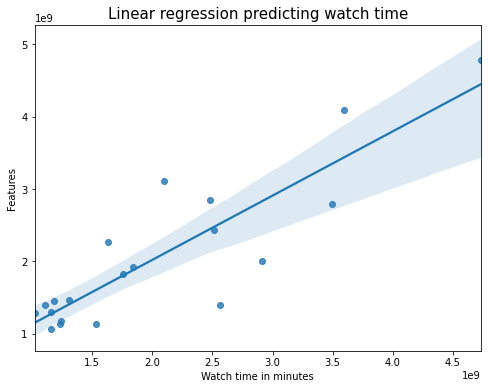

In [38]:
plt.figure(figsize=(8,6))
sns.regplot(pred,y_test)
plt.xlabel('Watch time in minutes')
plt.ylabel('Features')
plt.title("Linear regression predicting watch time", fontsize=15)
plt.show()


## 5. Conclusions for the top 3000 twitch channels in 2020 <a id='index5'></a>

1. English twitch channels are by far the most watched streams, followed up by Spanish and Portuguese channels. [[1]](#1)
2. 95% of the channels are partnered [[2]](#2)
3. 26% of the channels contain mature content. [[3]](#3)
4. On average, streamers have streamed for 1780 hours in 2020. ( 149 hours per month, 34 hours per week, 5 hours per day) [[4]](#4)
5. The average streamer has 3000 viewers and 370k followers [[5]](#4)

*. Note that conclusions 4 and 5 are based on largely skewed data, as seen in the provided boxplot visualizations <br>
[Back To Index](#index)


Possible ideas to be added:
1. Dashboard using the dash package